<a href="https://colab.research.google.com/github/KengoTobita/Weeyble_Python_startup/blob/master/Python_startup_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print("hello world")

hello world


In [0]:
turanari = [0,1.2]
print(turanari)

[0, 1.2]


In [0]:
import numpy as np

a = np.array([1,2,3,4])
b = np.array([4,5,6,7])

np.dot(a,b)

60

# MNIST Data version

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

image size is ...  (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 21

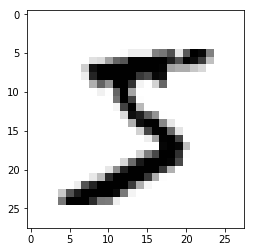

In [27]:
batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("image size is ... ",x_train[0].shape)
print(x_train[0])
plt.imshow(x_train[0].reshape(28,28),cmap='gray_r')
plt.show()

In [12]:
x_train = x_train.reshape(60000, 784) # 2次元配列を1次元に変換
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')   # int型をfloat32型に変換
x_test = x_test.astype('float32')
x_train /= 255                        # [0-255]の値を[0.0-1.0]に変換
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,  # 画像とラベルデータ
                    batch_size=batch_size,
                    epochs=epochs,     # エポック数の指定
                    verbose=1,         # ログ出力の指定. 0だとログが出ない
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W0721 06:00:34.340087 139806314145664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 06:00:34.376980 139806314145664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 06:00:34.386033 139806314145664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 06:00:34.414355 139806314145664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0721 06:00:34.424941 

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


W0721 06:00:34.820705 139806314145664 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.2434 - acc: 0.9256 - val_loss: 0.1031 - val_acc: 0.9669
Epoch 2/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.1020 - acc: 0.9695 - val_loss: 0.0770 - val_acc: 0.9767
Epoch 3/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0753 - acc: 0.9766 - val_loss: 0.0952 - val_acc: 0.9742
Epoch 4/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0603 - acc: 0.9816 - val_loss: 0.0724 - val_acc: 0.9799
Epoch 5/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.0499 - acc: 0.9851 - val_loss: 0.0733 - val_acc: 0.9811
Epoch 6/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.0427 - acc: 0.9871 - val_loss: 0.0730 - val_acc: 0.9825
Epoch 7/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0395 - acc: 0.9885 - val_loss: 0.

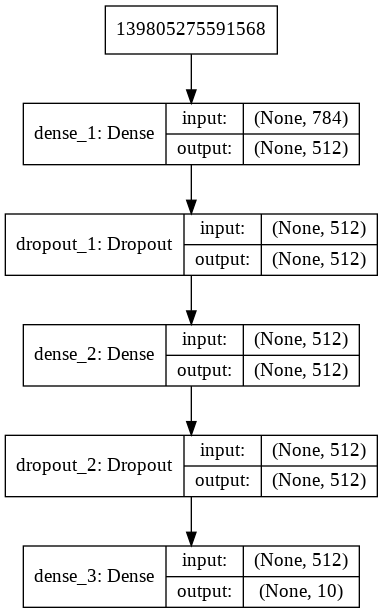

In [13]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

from IPython.display import Image, display_png
display_png(Image("model.png"))

# CHIFAR10 version

image size is ...  (32, 32, 3)
image's labele is ...  [6]


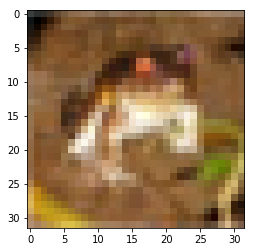

In [16]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

print("image size is ... " , x_train[0].shape)
print("image's labele is ... ", y_train[0])    # 多分カエル
plt.imshow(x_train[0])

In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.datasets import cifar10
from keras.utils import np_utils

#cifar10をダウンロード
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#画像を0-1の範囲で正規化
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

#正解ラベルをOne-Hot表現に変換
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [19]:
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

history=model.fit(x_train,y_train,batch_size=128,nb_epoch=20,verbose=1,validation_data=(x_test, y_test))
#評価
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 293s 6ms/step - loss: 1.5958 - acc: 0.4184 - val_loss: 1.2285 - val_acc: 0.5603
Epoch 2/20
50000/50000 [==============================] - 290s 6ms/step - loss: 1.1891 - acc: 0.5767 - val_loss: 1.0411 - val_acc: 0.6324
Epoch 3/20
50000/50000 [==============================] - 291s 6ms/step - loss: 1.0019 - acc: 0.6483 - val_loss: 0.8683 - val_acc: 0.6938
Epoch 4/20
50000/50000 [==============================] - 289s 6ms/step - loss: 0.8796 - acc: 0.6907 - val_loss: 0.8048 - val_acc: 0.7126
Epoch 5/20
50000/50000 [==============================] - 289s 6ms/step - loss: 0.7976 - acc: 0.7199 - val_loss: 0.7516 - val_acc: 0.7354
Epoch 6/20
50000/50000 [==============================] - 288s 6ms/step - loss: 0.7273 - acc: 0.7467 - val_loss: 0.7283 - val_acc: 0.7489
Epoch 7/20
50000/50000 [==============================] - 287s 6ms/step - loss: 0.6792 - acc: 0.7617 - val_loss: 0.7341 - 

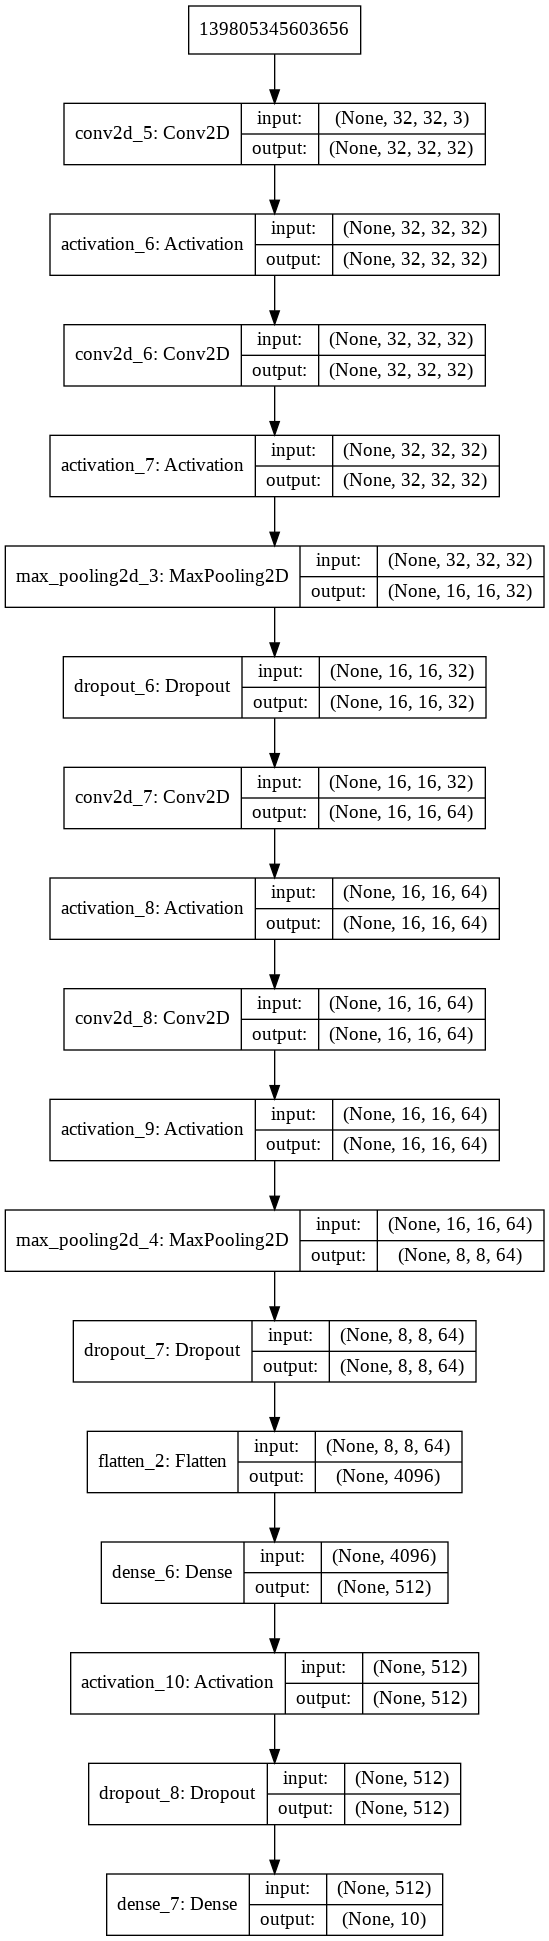

In [20]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

from IPython.display import Image, display_png
display_png(Image("model.png"))